# Find all datasets in use so far

In [ ]:
import json

index_path = '/itet-stor/maxihuber/deepeye_storage/index_files/full_pkl_index.json'
with open(index_path, 'r') as file:
    index = json.load(file)

In [4]:
datasets = set()

for i, index_element in enumerate(index):
    datasets.add(index_element["Dataset"])

datasets_path = '/home/maxihuber/eeg-foundation/development/experiment_management/dataset_to_id.json'
with open(datasets_path, 'r') as file:
    all_datasets = set(list(json.load(file).keys()))

missing_datasets = all_datasets - datasets

for dataset in missing_datasets:
    print(dataset)

MI_MI_Two
ERP_ERP_FHD
ERP_ERP_BISC


# Change transforms applied in __getitem__

## Make histogram of durations

In [27]:
idx_path = "/itet-stor/maxihuber/deepeye_storage/index_files/full_tueg_index.json"
with open(idx_path, 'r') as file:
    index = json.load(file)
    print(len(index))
    print(index[0])

69652
{'path': '/053/aaaaahzo/s003_2013_06_07/01_tcp_ar/aaaaahzo_s003_t000.edf', 'channels': ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EEG T1-REF', 'EEG T2-REF'], 'ref': 'AR', 'sr': 250.0, 'duration': 1233.996}


In [87]:
# File paths
index_paths = [
    "/itet-stor/maxihuber/deepeye_storage/index_files/full_pkl_index.json", 
    "/itet-stor/maxihuber/deepeye_storage/index_files/full_tueg_index.json"
]

# Load data
index = []
for index_path in index_paths:
    with open(index_path, 'r') as file:
        index.extend(json.load(file))
print(len(index))

417112


417112
3509
this 5977
209
3107
118289


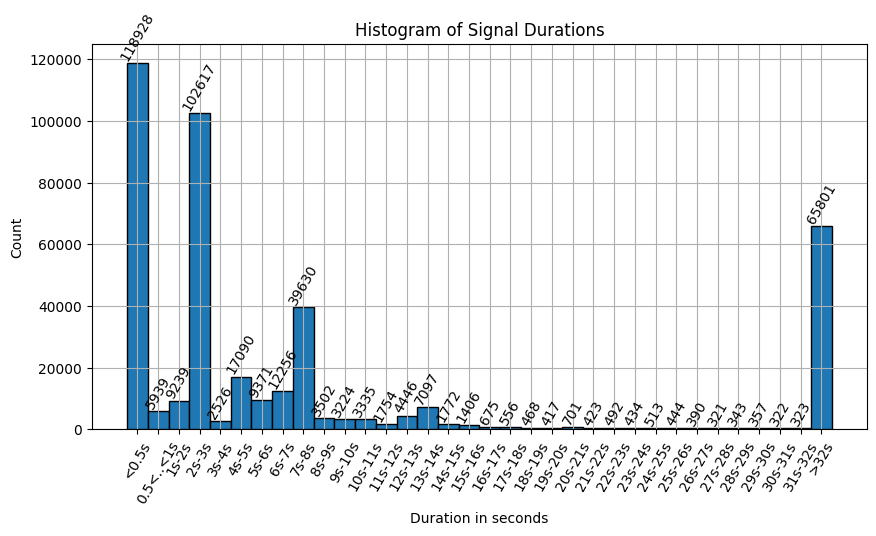

In [161]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Collect durations
durations = [element["duration"] for element in index if "duration" in element]
zero_durations = [element["duration"] for element in index if element["duration"] < .1]
short_durations = [element["duration"] for element in index if (.5 <= element["duration"] and element["duration"] <= 1)]
short_durations_edf = [element["duration"] for element in index if (.1 <= element["duration"] and element["duration"] <= 1) and element["path"].endswith(".edf")]
short_durations_pkl = [element["duration"] for element in index if (.1 <= element["duration"] and element["duration"] <= 1) and element["path"].endswith("pkl")]

print(len(durations))
print(len(zero_durations))
print("this", len(short_durations))
print(len(set(short_durations)))
print(len(short_durations_edf))
print(len(short_durations_pkl))

bins = list(range(1, 33))  # Your existing bins from 1s to 32s

# Compute histogram data manually
hist, bin_edges = np.histogram(durations, bins=[0, 0.5] + bins + [np.inf])  # Include inf for >32s

# Create histogram plot
plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(hist)), hist, align='center', width=1, edgecolor='black')

# Add text annotations above each bar
for bar, count in zip(bars, hist):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(count), ha='center', va='bottom', rotation=60)

# Adjust x-ticks to show all bins including special categories
tick_labels = ['<0.5s'] + [f"{0.5}<..<{i}s" if i == 1 else f"{i-1}s-{i}s" for i in range(1, 33)] + ['>32s']
plt.xticks(ticks=range(len(hist)), labels=tick_labels, rotation=60)

plt.xlabel('Duration in seconds')
plt.ylabel('Count')
plt.title('Histogram of Signal Durations')
plt.grid(True)
plt.show()

## Get the plotting code

In [ ]:
# todo

## Apply FFT, Crop & Std and Plot

## compute spectros for each sampling rate

In [113]:
import json

index_paths = ["/itet-stor/maxihuber/deepeye_storage/index_files/full_pkl_index.json", 
               "/itet-stor/maxihuber/deepeye_storage/index_files/full_tueg_index.json"]

index = []

for index_path in index_paths:
    with open(index_path, 'r') as file:
        index += json.load(file)
        print(len(index))

srs = {}

for i, index_element in enumerate(index):
    if index_element["sr"] not in srs:
        if index_element["path"].endswith(".edf"):
            index_element["path"] = "/itet-stor/maxihuber/deepeye_storage/foundation/tueg/edf" + index_element["path"]
        srs[index_element["sr"]] = index_element

srs = {sr: srs[sr] for sr in sorted(srs)}

for sr, index_element in srs.items():
    print(f"{sr}:", index_element)
    print("-" * 100)

347460
417112
100: {'path': '/itet-stor/maxihuber/deepeye_storage/foundation_prepared/MI_MI_VEP_MVEP_VPiac_mat_8887d1da-a913-11ee-a8d4-001e6744589c_session1_online_trial3577.pkl', 'channels': ['FP1', 'FP2', 'AF7', 'AF3', 'AF4', 'AF8', 'F9', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2'], 'ref': None, 'sr': 100, 'duration': 0.19, 'montage': 'standard_1020', 'channels_mapped': ['Fp1', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P9', 'P7', 'P5', 

In [114]:
import torchaudio
import torch

import sys
sys.path.append('/home/maxihuber/eeg-foundation/src/data')

from transforms import (
    load_path_data,
    custom_fft,
    crop_spectrogram,
    standardize,
)

p_loader = load_path_data()

frequencies = set()

for sr, index_element in srs.items():

    if index_element["duration"] < 1:
        continue
    
    if sr == 100:
        continue
    
    channel_data_dict = p_loader(index_element)

    for channel, signal in channel_data_dict.items():

        # Convert to u_volt (micro-volt)
        signal = signal * 1_000_000

        # Here, the saving happens in the new load method

        # Put signal into bin [1-2, 2-3, ..., 31-32, >32], and chop off ms to have full second signals
        # Split >32 signals into multiple bins, the first chunk into the 31-32 bin, the rest as it fits
        
        
        signal = torch.from_numpy(signal)

        fft = custom_fft(
            window_seconds=1,
            window_shift=0.0625,
            sr=sr,
            cuda=False,
        )
        
        # Applies STFT, returns spectrogram in DB (Decibel) scale
        spg = fft(signal)  # Compute the spectrogram using FFT.
        frequencies.add(spg.shape[0])
        print(f"{sr}:", spg.shape, ", dur:", index_element["duration"], ", len(signal):", len(signal))

        # only process one channel for illustration purposes
        break

print(sorted(frequencies))

assert False, "break here"

# Example parameters
n_fft = 256
win_length = 256
hop_length = 64

# Create an example signal
signal = torch.randn(16000)  # Example size, simulate 1 second at 16kHz

# Initialize the Spectrogram transform
spectrogram = torchaudio.transforms.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    normalized=True
)
crop = crop_spectrogram(target_size=[64,64])
std = standardize()

# Apply the transform
spg = spectrogram(signal)
print(spg.shape)
spg = crop(spg)
print(spg.shape)
spg = std(spg)
print(spg.shape)

128: torch.Size([65, 84]) , dur: 5.195312 , len(signal): 666
160: torch.Size([81, 1969]) , dur: 122.99375 , len(signal): 19680
200: torch.Size([101, 51]) , dur: 2.995 , len(signal): 600
250: torch.Size([126, 123]) , dur: 7.32 , len(signal): 1831
256: torch.Size([129, 2401]) , dur: 150.0 , len(signal): 38401
400.0: torch.Size([201, 5361]) , dur: 334.9975 , len(signal): 134000
500: torch.Size([251, 116]) , dur: 7.138 , len(signal): 3570
512: torch.Size([257, 95]) , dur: 5.902344 , len(signal): 3023
563: torch.Size([282, 966]) , dur: 59.9993 , len(signal): 33792
565: torch.Size([283, 970]) , dur: 59.999319 , len(signal): 33920
567: torch.Size([284, 973]) , dur: 59.997623 , len(signal): 34048
717: torch.Size([359, 82]) , dur: 4.998643 , len(signal): 3584
1000: torch.Size([501, 49]) , dur: 2.999 , len(signal): 3000
[65, 81, 101, 126, 129, 201, 251, 257, 282, 283, 284, 359, 501]


AssertionError: break here

## compute spectros for each duration

In [106]:
durs = {dur: None for dur in list(range(1,32)) + [np.inf]}
print(durs)

def get_duration(index_element):
    if index_element["duration"] >= 32:
        dur = np.inf
    else:
        dur = int(index_element["duration"])
    return dur
    

for index_element in index:
    # find corresponding dur
    dur = get_duration(index_element)

    if dur == 0:
        continue

    if durs[dur] == None:
        durs[dur] = index_element

for dur, index_element in durs.items():
    print(f"{dur}:", index_element)

{1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: None, 28: None, 29: None, 30: None, 31: None, inf: None}
1: {'path': '/itet-stor/maxihuber/deepeye_storage/foundation_prepared/ERP_ERP_BICF_Subject39_115e26b4-c21c-11ee-8df0-001e67445825_session3_trial49.pkl', 'channels': ['FP1', 'FP2', 'AFz', 'F7', 'F3', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO7', 'O1', 'Oz', 'O2', 'PO8', 'PO9', 'PO10'], 'ref': None, 'sr': 512, 'duration': 1.876953, 'montage': 'standard_1020', 'channels_mapped': ['Fp1', 'Fp2', 'AFz', 'F7', 'F3', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO7', 'O1', 'Oz', 'O2', 'PO8', 'PO9', 'PO10'], 'Dataset'

In [162]:
import torchaudio
import torch
import numpy as np
import sys

sys.path.append('/home/maxihuber/eeg-foundation/src/data')
from transforms import (
    load_path_data,
    custom_fft,
    crop_spectrogram,
    standardize,
)

# Assuming p_loader is a function returning a dictionary of channel data
p_loader = load_path_data()

dur_shapes = {}

for dur, index_element in durs.items():

    sr = index_element["sr"]
    dur = get_duration(index_element)

    if dur == 0 or sr == 100:
        continue
    
    channel_data_dict = p_loader(index_element)

    for channel, signal in channel_data_dict.items():
        
        # Convert to u_volt (micro-volt)
        signal *= 1_000_000

        # Cut the signal to the nearest lower integer second:
        # Calculate the number of samples that correspond to the nearest full second
        
        signal_chunks = []
        # Further processing if the duration is greater than 32s
        if dur == np.inf:

            # while we have more than 1s of signal left
            while len(signal) >= 32 * sr:
                signal_chunks.append(signal[:32 * sr])
                signal = signal[32 * sr:]

            # if we have more than 1s left, add this also
            if len(signal) >= sr:
                signal_chunks.append(signal[:int(len(signal) / sr) * sr])
        else:
            signal_chunks = [signal[:dur * sr]]

        for signal_chunk in signal_chunks:
        
            # Conversion to a torch tensor
            signal_chunk = torch.from_numpy(signal_chunk)
            
            # Apply FFT
            fft = custom_fft(
                window_seconds=1,
                window_shift=0.0625,
                sr=sr,
                cuda=False,
            )
            
            # Applies STFT, returns spectrogram in DB (Decibel) scale
            spg = fft(signal_chunk)  # Compute the spectrogram using FFT.
            print(f"{sr}:", spg.shape, ", dur:", int(len(signal_chunk)/ sr), ", len(signal):", len(signal))
            if not dur in dur_shapes:
                dur_shapes[dur] = spg.shape[1]
            print('-' * 100)            
            
        # only one channel    
        break

print({dur: dur_shapes[dur] for dur in sorted(dur_shapes)})

512: torch.Size([257, 17]) , dur: 1 , len(signal): 962
----------------------------------------------------------------------------------------------------
512: torch.Size([257, 33]) , dur: 2 , len(signal): 1335
----------------------------------------------------------------------------------------------------
128: torch.Size([65, 49]) , dur: 3 , len(signal): 413
----------------------------------------------------------------------------------------------------
512: torch.Size([257, 65]) , dur: 4 , len(signal): 2149
----------------------------------------------------------------------------------------------------
512: torch.Size([257, 81]) , dur: 5 , len(signal): 3023
----------------------------------------------------------------------------------------------------
512: torch.Size([257, 97]) , dur: 6 , len(signal): 3550
----------------------------------------------------------------------------------------------------
512: torch.Size([257, 113]) , dur: 7 , len(signal): 3820
----

## new cropping and standardization methods

In [163]:
import torchaudio
import torch
import numpy as np
import sys
import matplotlib.pyplot as plt

class custom_fft:
    """
    FFT transform that takes in a window size and shift
    and computes the spectrogram using the torchaudio library.

    The output is converted to decibel scale, and normalized to have zero mean and unit variance.
    """
    def __init__(self, window_seconds, window_shift, sr, cuda=False):
        super().__init__()
        win_length = int(sr * window_seconds)
        hop_length = int(sr * window_shift)
        self.fft = torchaudio.transforms.Spectrogram(
            n_fft=win_length,
            win_length=win_length,
            hop_length=hop_length,
            normalized=True,
        )
        if cuda:
            self.fft = self.fft.to("cuda")

    def __call__(self, data):
        """
        Apply short-time Fourier transform (STFT) to the input data.

        Args:
            data (torch.Tensor): The input data.

        Returns:
            torch.Tensor: The transformed data.
        """
        spg = self.fft(data)
        spg = spg ** 2
        return spg

def crop_spg(spg):
    # Crop spg to the nearest multiple of 16 in both dimensions
    new_height = (spg.shape[0] // 16) * 16  # Integer division and multiplication to find the nearest multiple
    new_width = (spg.shape[1] // 16) * 16
    spg = spg[:new_height, :new_width]  # Crop both dimensions
    return spg

def normalize_spg(spg):
    # Divide spectrogram by frequency bin-wise means
    freq_means = spg[:,:].mean(dim=1, keepdim=True)
    # Divide each frequency bin by its mean
    normalized_spg = spg[:,:] / freq_means
    # Transform to decibel-scale
    db_spg = 10 * torch.log10(normalized_spg)
    return db_spg

def plot_spg(spg, sr, dur):
    plt.pcolormesh(spg, shading="auto", cmap="viridis")
    plt.ylabel("Frequency Bins")
    plt.xlabel("steps")
    plt.title(f"Spectrogram: {sr}, {dur}")
    plt.colorbar(label="")
    plt.show()

def plot_spg2(spg1, spg2, sr, dur, i):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Creates a figure and a 1x2 grid of subplots
    
    # Plot the first spectrogram
    cax1 = axes[0].pcolormesh(10 * torch.log10(spg1), shading="auto", cmap="viridis")
    axes[0].set_title(f"Non-Normalized: {sr} Hz, Duration: {dur}s")
    axes[0].set_ylabel("Frequency Bins")
    axes[0].set_xlabel("Time Steps")
    fig.colorbar(cax1, ax=axes[0], label='Intensity dB')
    
    # Plot the second spectrogram
    cax2 = axes[1].pcolormesh(spg2, shading="auto", cmap="viridis")
    axes[1].set_title(f"Normalized: {sr} Hz, Duration: {dur}s")
    axes[1].set_ylabel("Frequency Bins")
    axes[1].set_xlabel("Time Steps")
    fig.colorbar(cax2, ax=axes[1], label='Intensity dB')
    
    # Save the plot
    plt.savefig(f'/home/maxihuber/eeg-foundation/results/spectro_plots_all_durations/plot_{i}.png')
    plt.close(fig)

sys.path.append('/home/maxihuber/eeg-foundation/src/data')
from transforms import load_path_data

# Assuming p_loader is a function returning a dictionary of channel data
p_loader = load_path_data()

for i, (dur, index_element) in enumerate(durs.items()):

    sr = index_element["sr"]
    dur = get_duration(index_element)

    if dur == 0 or sr == 100:
        continue
    
    channel_data_dict = p_loader(index_element)

    for channel, signal in channel_data_dict.items():
        
        # Convert to u_volt (micro-volt)
        signal *= 1_000_000

        # Cut the signal to the nearest lower integer second:
        signal_chunks = []
        # Further processing if the duration is greater than 32s
        if dur == np.inf:

            # while we have more than 1s of signal left
            while len(signal) >= 32 * sr:
                signal_chunks.append(signal[:32 * sr])
                signal = signal[32 * sr:]

            # if we have more than 1s left, add this also
            if len(signal) >= sr:
                signal_chunks.append(signal[:int(len(signal) / sr) * sr])
        else:
            signal_chunks = [signal[:dur * sr]]

        for signal_chunk in signal_chunks:

            # Here, we would usually store the signal
            # ==============================================================================================================
            # For now, we are testing transforms
        
            # Conversion to a torch tensor
            signal_chunk = torch.from_numpy(signal_chunk)
            
            # Apply FFT
            fft = custom_fft(
                window_seconds=1,
                window_shift=1/16,
                sr=sr,
                cuda=False,
            )

            shapes = []
            
            # Applies STFT, returns spectrogram in DB (Decibel) scale
            spg = fft(signal_chunk)  # Compute the spectrogram using FFT.
            shapes.append(spg.shape)
            
            # Apply cropping
            spg1 = crop_spg(spg)
            shapes.append(spg1.shape)

            # plot_spg(spg, sr, int(len(signal_chunk)/ sr))

            # Apply normalization
            spg2 = normalize_spg(spg1)
            shapes.append(spg2.shape)
            
            # Plot results
            plot_spg2(spg1, spg2, sr, int(len(signal_chunk)/ sr), i)
            
            print(f"{i} --- dur: {int(len(signal_chunk)/ sr)}, spg shapes: {shapes}")
            break # only one signal chunk per duration for plotting now
            
        # only one channel for illustration purposes 
        break

0 --- dur: 1, spg shapes: [torch.Size([257, 17]), torch.Size([256, 16]), torch.Size([256, 16])]
1 --- dur: 2, spg shapes: [torch.Size([257, 33]), torch.Size([256, 32]), torch.Size([256, 32])]
2 --- dur: 3, spg shapes: [torch.Size([65, 49]), torch.Size([64, 48]), torch.Size([64, 48])]
3 --- dur: 4, spg shapes: [torch.Size([257, 65]), torch.Size([256, 64]), torch.Size([256, 64])]
4 --- dur: 5, spg shapes: [torch.Size([257, 81]), torch.Size([256, 80]), torch.Size([256, 80])]
5 --- dur: 6, spg shapes: [torch.Size([257, 97]), torch.Size([256, 96]), torch.Size([256, 96])]
6 --- dur: 7, spg shapes: [torch.Size([257, 113]), torch.Size([256, 112]), torch.Size([256, 112])]
7 --- dur: 8, spg shapes: [torch.Size([257, 129]), torch.Size([256, 128]), torch.Size([256, 128])]
8 --- dur: 9, spg shapes: [torch.Size([257, 145]), torch.Size([256, 144]), torch.Size([256, 144])]
9 --- dur: 10, spg shapes: [torch.Size([257, 161]), torch.Size([256, 160]), torch.Size([256, 160])]
10 --- dur: 11, spg shapes: [t

## Plot the effects of normalization for all signal durations

In [164]:
from PIL import Image
import os
from natsort import natsorted

def combine_images(image_folder, output_path, grid_size):
    images = [Image.open(os.path.join(image_folder, img)) for img in natsorted(os.listdir(image_folder)) if img.endswith('.png')]
    width, height = images[0].size
    
    grid_width, grid_height = grid_size
    total_width = width * grid_width
    total_height = height * grid_height
    
    new_im = Image.new('RGB', (total_width, total_height))
    
    x_offset = 0
    y_offset = 0
    count = 0
    for im in images:
        new_im.paste(im, (x_offset, y_offset))
        x_offset += width
        count += 1
        if count % grid_width == 0:
            x_offset = 0
            y_offset += height
    
    new_im.save(output_path)

# Call this function with appropriate parameters
combine_images('/home/maxihuber/eeg-foundation/results/spectro_plots_all_durations',
               '/home/maxihuber/eeg-foundation/results/spectro_plots_all_durations/combined_grid.png', (4, 8))

# ==========================================================

In [16]:
import json

def print_ie(index_element):
    for k, v in index_element.items():
        print(f"{k}:", v)

index_path = '/itet-stor/maxihuber/deepeye_storage/index_files/full_tueg_index.json'
with open(index_path, 'r') as file:
    index = json.load(file)

short_index = index[:10]

print(len(short_index))

assert False, "break before dumping"
short_index_path = '/itet-stor/maxihuber/deepeye_storage/index_files/short_tueg_index.json'
with open(short_index_path, 'w') as file:
    json.dump(short_index, file, indent=4)
    print("Dumped file!")

10


AssertionError: break before dumping

In [12]:
import os, sys
import glob
import json
from socket import gethostname

TMPDIR = '/itet-stor/maxihuber/net_scratch/runs/943432/tmp'

file_paths = sorted(glob.glob(
    os.path.join(TMPDIR, f"index_path_{gethostname()}_*.txt")
))
for file_path in file_paths:
    print(file_path)

paths = {}
num_datapoints = 0

for file_path in file_paths:

    with open(file_path, "r") as pointer_file:
        path_to_data_index = pointer_file.read()

        with open(path_to_data_index, "r") as index_file:
            chunks_index = json.load(index_file)

            for _, chunk_path in chunks_index.items():

                paths[num_datapoints] = chunk_path
                num_datapoints += 1

print(len(paths))

/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_0.txt
/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_1.txt
/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_2.txt
/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_3.txt
/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_4.txt
/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_5.txt
/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_6.txt
/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_7.txt
/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_8.txt
/itet-stor/maxihuber/net_scratch/runs/943432/tmp/index_path_arton06_9.txt
2440011


In [3]:
# try teardown
import shutil, os

STORDIR = '/dev/shm/mae'
if os.path.exists(STORDIR):
    print(f"Removing all files and subdirectories in: {STORDIR}")
    shutil.rmtree(STORDIR)
    print(f"Removed all files and subdirectories in {STORDIR}")

Removing all files and subdirectories in: /dev/shm/mae
Removed all files and subdirectories in /dev/shm/mae


# Data Management System

In [9]:
import os
import json

index_paths = ["/itet-stor/maxihuber/deepeye_storage/index_files/full_tueg_index.json", 
               "/itet-stor/maxihuber/deepeye_storage/index_files/full_pkl_index.json"]
path_prefix = '/itet-stor/maxihuber/deepeye_storage/foundation/tueg/edf'

index = []

total_size = 0

with open(index_paths[0], 'r') as file:
    tueg_index = json.load(file)

print(len(tueg_index))


tmp = """
for index_path in index_paths:
    with open(index_path, 'r') as file:
        temp_index = json.load(file)
        for i, index_element in enumerate(temp_index):
            if index_element["path"].endswith(".edf"):
                    index_element["path"] = path_prefix + index_element["path"]
            index.append(index_element)
            total_size += os.path.getsize(index_element["path"]) / (1024 ** 3)
            if i % 10_000 == 0:
                print(f"Processed {i} files. Currently at {round(total_size,2)}GB of data.")
"""
print(len(index))
print(total_size)

Processed 0 files. Currently at 0.02GB of data.
Processed 10000 files. Currently at 243.42GB of data.
Processed 20000 files. Currently at 477.77GB of data.
Processed 30000 files. Currently at 742.3GB of data.
Processed 40000 files. Currently at 967.9GB of data.
Processed 50000 files. Currently at 1168.2GB of data.
Processed 60000 files. Currently at 1386.76GB of data.
Processed 0 files. Currently at 1638.91GB of data.
Processed 10000 files. Currently at 1656.32GB of data.
Processed 20000 files. Currently at 1674.38GB of data.
Processed 30000 files. Currently at 1686.26GB of data.
Processed 40000 files. Currently at 1696.85GB of data.
Processed 50000 files. Currently at 1707.02GB of data.
Processed 60000 files. Currently at 1717.68GB of data.
Processed 70000 files. Currently at 1727.96GB of data.
Processed 80000 files. Currently at 1738.5GB of data.
Processed 90000 files. Currently at 1748.84GB of data.
Processed 100000 files. Currently at 1759.4GB of data.
Processed 110000 files. Curre

# Get size of index contents

In [21]:
def get_index_sizes(index_paths: list):
    index_sizes = [0] * len(index_paths)
    for i, index_path in enumerate(index_paths):
        with open(index_path, 'r') as file:
            temp_index = json.load(file)
            temp_index = temp_index[:len(temp_index) // 5]
            for i, index_element in enumerate(temp_index):
                if index_element["path"].endswith(".edf"):
                        index_element["path"] = path_prefix + index_element["path"]
                total_size += os.path.getsize(index_element["path"]) / (1024 ** 3)
                if i % 10_000 == 0:
                    print(f"Processed {i} files. Currently at {round(total_size,2)}GB of data.")
            index_sizes[i] = total_size

def get_index_size(index):
    total_size = 0
    for i, index_element in enumerate(index):
        total_size += os.path.getsize(index_element["path"]) / (1024 ** 3)
    return total_size

In [12]:
index_paths = ["/itet-stor/maxihuber/deepeye_storage/index_files/full_tueg_index.json", 
               "/itet-stor/maxihuber/deepeye_storage/index_files/full_pkl_index.json"]
path_prefix = '/itet-stor/maxihuber/deepeye_storage/foundation/tueg/edf'

index = []
total_size = 0

for index_path in index_paths:
    with open(index_path, 'r') as file:
        temp_index = json.load(file)
        temp_index = temp_index[:len(temp_index) // 5]
        for i, index_element in enumerate(temp_index):
            if index_element["path"].endswith(".edf"):
                    index_element["path"] = path_prefix + index_element["path"]
            index.append(index_element)
            total_size += os.path.getsize(index_element["path"]) / (1024 ** 3)
            if i % 10_000 == 0:
                print(f"Processed {i} files. Currently at {round(total_size,2)}GB of data.")

print(len(index))
print(round(total_size,2))

Processed 0 files. Currently at 0.02GB of data.
Processed 10000 files. Currently at 243.42GB of data.
13930
311.0793815199286


In [18]:
with open(index_paths[0], 'r') as file:
    temp_index = json.load(file)
    temp_index = temp_index[:len(temp_index) // 5]
    print(len(temp_index))

assert False, "break before dumping"

stor_path = '/itet-stor/maxihuber/deepeye_storage/index_files/311G_tueg_index.json'
with open(stor_path, 'w') as file:
    json.dump(temp_index, file)
    print("Dumped!")

13930
Dumped!


# Implement proportional-to-size splitting of index list

In [22]:
import os
import yaml
from math import ceil
import sys
# Add the directory containing your module to sys.path
sys.path.append('/home/maxihuber/eeg-foundation/preloading')
# Now you can import normally
from preload_chunk import LocalLoader, filter_index, get_index_sizes

def main(data_config, num_chunks, idx):
    # num_chunks: number of workers available in the system
    # idx: the id of the worker this program is called on (each worker executes this main method)

    #TMPDIR = f"{data_config['runs_dir']}/{os.environ['SLURM_ARRAY_JOB_ID']}/tmp"
    #os.makedirs(TMPDIR, exist_ok=True)

    local_loader = LocalLoader(
        base_stor_dir=data_config["STORDIR"],
    )

    index, index_lens, index_sizes = filter_index(
        index_paths=data_config["data_dir"],
        path_prefix=data_config["path_prefix"],
        min_duration=data_config["min_duration"],
        max_duration=data_config["max_duration"],
        select_sr=data_config["select_sr"],
        select_ref=data_config["select_ref"],
    )

    # Calculate total size for normalization
    total_size = sum(index_sizes)
    
    # Calculate number of chunks each root_directory should get based on size
    # E.g. 6 workers for tueg data, 4 workers for pkl data (data is distributed to num_chunks workers in total)
    num_chunks_per_directory = [ceil((size / total_size) * num_chunks) for size in index_sizes]

    # Adjust chunk numbers to sum up to the total number of chunks available
    while sum(num_chunks_per_directory) > num_chunks:
        max_index = num_chunks_per_directory.index(max(num_chunks_per_directory))
        num_chunks_per_directory[max_index] -= 1
        
    # Create global index chunks based on calculated per-directory chunks
    start_idx = 0
    global_index_chunks = []
    for dir_idx, chunks in enumerate(num_chunks_per_directory):
        # Compute the size of a chunk for this directory
        # (e.g. 1'000 files per tueg worker, 20'000 files per pkl worker)
        chunk_size = ceil(index_lens[dir_idx] / chunks)
        for chunk_idx in range(chunks):
            chunk_start = start_idx + chunk_idx * chunk_size
            chunk_end = min(chunk_start + chunk_size, start_idx + index_lens[dir_idx])
            global_index_chunks.append(index[chunk_start:chunk_end])
        start_idx += index_lens[dir_idx]

    # Assign chunk to current worker
    len_index_chunks = [len(index_chunk) for index_chunk in global_index_chunks]
    print(len_index_chunks, file=sys.stderr)

    # Print information about global chunk distribution
    processed = 0
    for idx in range(num_chunks):
        if idx < len(global_index_chunks):
            index_chunk = global_index_chunks[idx]
            print(
                f"Worker {idx} processes {len(index_chunk)} files ({round(get_index_size(index_chunk),1)} GB) from index {processed} to {processed + len(index_chunk)}",
                file=sys.stderr
            )
        else:
            index_chunk = []
            print(f"Worker {idx} has no files to process.", file=sys.stderr)
        processed += len(index_chunk)

    # Process the index_chunk for this idx...
    index_chunk = global_index_chunks[idx] if idx < len(global_index_chunks) else []
    
    # (Add your processing logic here)

num_chunks = 5
idx = 0

# Load main config file
main_config_file = "/home/maxihuber/eeg-foundation/configs/experiment/maxim.yaml"
with open(main_config_file, "r") as file:
    config = yaml.safe_load(file)
    data_config = config["data"]

main(data_config, num_chunks, idx)

Filtering data dir
==========filtered 0 files==========
==========filtered 10000 files==========
==========filtered 20000 files==========
==========filtered 30000 files==========
==========filtered 40000 files==========
==========filtered 50000 files==========
==========filtered 60000 files==========
==========filtered 70000 files==========
==========filtered 80000 files==========
==========filtered 90000 files==========
==========filtered 100000 files==========
==========filtered 110000 files==========
==========filtered 120000 files==========
==========filtered 130000 files==========
==========filtered 140000 files==========
==========filtered 150000 files==========
==========filtered 160000 files==========
==========filtered 170000 files==========
==========filtered 180000 files==========
==========filtered 190000 files==========
==========filtered 200000 files==========
==========filtered 210000 files==========
==========filtered 220000 files==========
==========filtered 230000 fil

[3, 3]
[2, 3]


Worker 0 processes 55929 files (156.3 GB) from index 0 to 55929
Worker 1 processes 55929 files (171.2 GB) from index 55929 to 111858
Worker 2 processes 4405 files (127.4 GB) from index 111858 to 116263
Worker 3 processes 4405 files (105.2 GB) from index 116263 to 120668
Worker 4 processes 4403 files (78.4 GB) from index 120668 to 125071
